# Emerging Technoology Project - G00358931
## Robert Donnelly
create a web service that uses machine learning to make predictions based on the data set powerproduction

In [236]:
#imports
import numpy as np
#parser
import pandas as pd
#plot
import matplotlib.pyplot as plot
#tensorflow
import tensorflow.keras as kr
#dbscan for outlier detection
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler




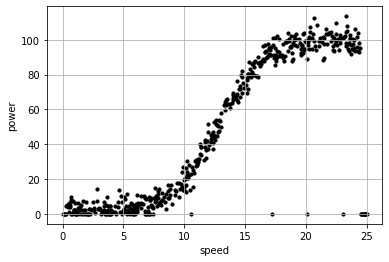

In [237]:
data = pd.read_csv("powerproduction.txt")

plot.scatter(
    data.values[:,0] , data.values[:,1] ,
    s=10, c='black')

#print dataset
plot.xlabel("speed")
plot.ylabel("power")
plot.grid()
plot.show()

v Trying to detect outliers with help from : https://www.youtube.com/watch?v=eq1zKgCFwkk&ab_channel=Dr.VytautasBielinskas v

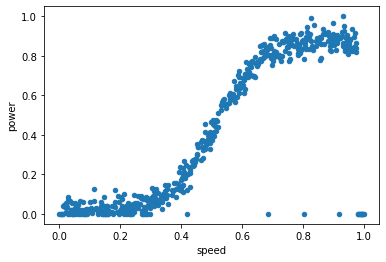

In [238]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['speed','power'])
data.plot.scatter(x='speed',y='power')
plot.show()

In [239]:
outlier_detetction = DBSCAN(eps=0.25, min_samples=50,metric='euclidean',n_jobs=-1)
outliers = outlier_detetction.fit_predict(data)

<AxesSubplot:xlabel='speed', ylabel='power'>

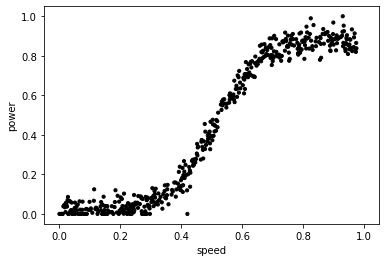

In [259]:
#plot data with no outliers
data.plot.scatter(x='speed',y='power',c=outliers,colorbar=False,s=10)

In [ ]:
#neural network
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(20, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

#train
model.fit(data['speed'], data['power'], epochs=500)


Epoch 1/500
16/16 [==============================] - 0s 667us/step - loss: 380.5435
Epoch 2/500
16/16 [==============================] - 0s 733us/step - loss: 367.0428
Epoch 3/500
16/16 [==============================] - 0s 733us/step - loss: 354.4591
Epoch 4/500
16/16 [==============================] - 0s 600us/step - loss: 342.3248
Epoch 5/500
16/16 [==============================] - 0s 600us/step - loss: 330.7391
Epoch 6/500
16/16 [==============================] - 0s 733us/step - loss: 318.5861
Epoch 7/500
16/16 [==============================] - 0s 733us/step - loss: 307.6116
Epoch 8/500
16/16 [==============================] - 0s 600us/step - loss: 296.1263
Epoch 9/500
16/16 [==============================] - 0s 600us/step - loss: 285.5404
Epoch 10/500
16/16 [==============================] - 0s 667us/step - loss: 274.1254
Epoch 11/500
16/16 [==============================] - 0s 600us/step - loss: 263.7887
Epoch 12/500
16/16 [==============================] - 0s 667us/step - loss

16/16 [==============================] - 0s 667us/step - loss: 0.2399
Epoch 100/500
16/16 [==============================] - 0s 667us/step - loss: 0.2424
Epoch 101/500
16/16 [==============================] - 0s 600us/step - loss: 0.2267
Epoch 102/500
16/16 [==============================] - 0s 666us/step - loss: 0.2197
Epoch 103/500
16/16 [==============================] - 0s 733us/step - loss: 0.2189
Epoch 104/500
16/16 [==============================] - 0s 800us/step - loss: 0.2111
Epoch 105/500
16/16 [==============================] - 0s 600us/step - loss: 0.2214
Epoch 106/500
16/16 [==============================] - 0s 600us/step - loss: 0.1944
Epoch 107/500
16/16 [==============================] - 0s 600us/step - loss: 0.2095
Epoch 108/500
16/16 [==============================] - 0s 600us/step - loss: 0.2016
Epoch 109/500
16/16 [==============================] - 0s 600us/step - loss: 0.2028
Epoch 110/500
16/16 [==============================] - 0s 667us/step - loss: 0.1840
Epoch 

16/16 [==============================] - 0s 667us/step - loss: 0.1524
Epoch 197/500
16/16 [==============================] - 0s 600us/step - loss: 0.1512
Epoch 198/500
16/16 [==============================] - 0s 600us/step - loss: 0.1466
Epoch 199/500
16/16 [==============================] - 0s 733us/step - loss: 0.1505
Epoch 200/500
16/16 [==============================] - 0s 667us/step - loss: 0.1451
Epoch 201/500
16/16 [==============================] - 0s 600us/step - loss: 0.1482
Epoch 202/500
16/16 [==============================] - 0s 666us/step - loss: 0.1527
Epoch 203/500
16/16 [==============================] - 0s 667us/step - loss: 0.1484
Epoch 204/500
16/16 [==============================] - 0s 667us/step - loss: 0.1512
Epoch 205/500
16/16 [==============================] - 0s 533us/step - loss: 0.1518
Epoch 206/500
16/16 [==============================] - 0s 666us/step - loss: 0.1475
Epoch 207/500
16/16 [==============================] - 0s 733us/step - loss: 0.1502
Epoch 

16/16 [==============================] - 0s 600us/step - loss: 0.1304
Epoch 294/500
16/16 [==============================] - 0s 667us/step - loss: 0.1312
Epoch 295/500
16/16 [==============================] - 0s 733us/step - loss: 0.1291
Epoch 296/500
16/16 [==============================] - 0s 600us/step - loss: 0.1294
Epoch 297/500
 1/16 [>.............................] - ETA: 0s - loss: 0.1239

In [ ]:
#loss
model.evaluate(data['speed'], data['power'])

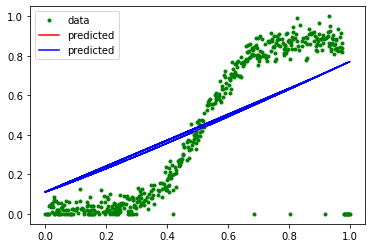

In [258]:
#show the predict 
plot.plot(data['speed'], data['power'],('.g') , label='data')
plot.plot(data['speed'], model.predict(data['speed']), color='red', label='predicted')
plot.plot(data['power'], model.predict(data['power']), color='blue', label='predicted')
plot.legend();

In [222]:
#save model